In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings(action='ignore') 

### # 데이터 파악 

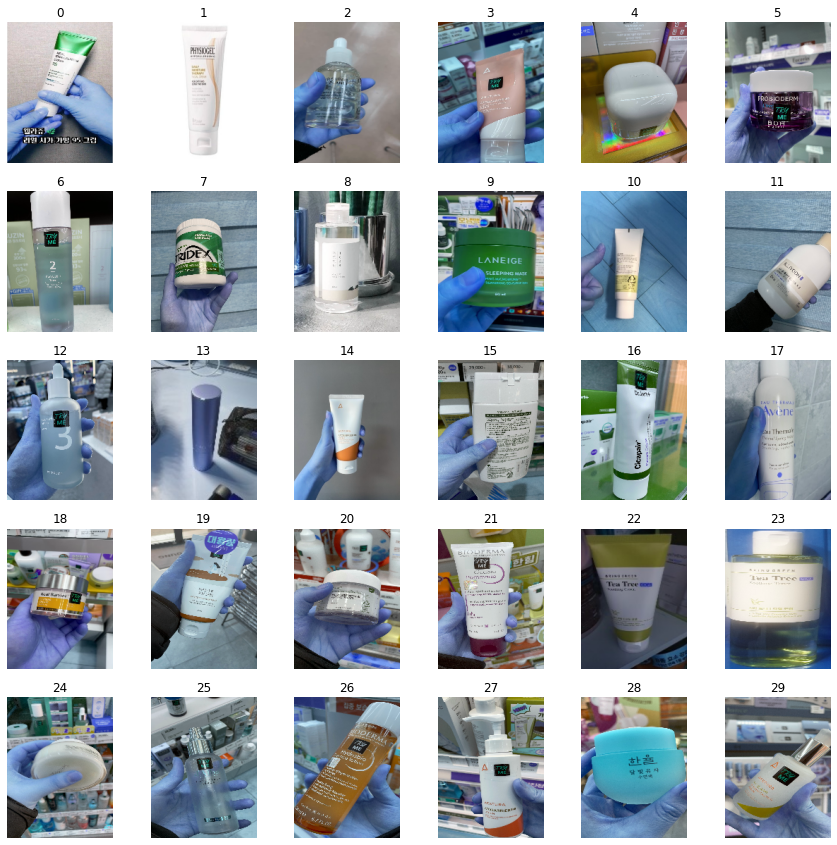

In [3]:
# class 별 이미지 확인

fig = plt.figure(figsize=(15, 15))
for i in range(30):
    p = f'E:/olive_young/selected_img/{i}'
    os.chdir(p) 
    files = os.listdir(p)
    img = cv2.imread(files[0])
    f = cv2.resize(img, (150, 200))
    plt.subplot(5,6,i+1)
    plt.imshow(f)
    plt.title(i)
    plt.axis('off')

In [4]:
# class 별 이미지 개수 확인

for i in range(30):
    p = f'E:/olive_young/selected_img/{i}'
    os.chdir(p) 
    files = os.listdir(p)
    print(f'{i} class: {len(files)}개')

0 class: 600개
1 class: 600개
2 class: 600개
3 class: 600개
4 class: 600개
5 class: 600개
6 class: 600개
7 class: 600개
8 class: 600개
9 class: 600개
10 class: 600개
11 class: 600개
12 class: 600개
13 class: 600개
14 class: 600개
15 class: 600개
16 class: 600개
17 class: 600개
18 class: 600개
19 class: 600개
20 class: 600개
21 class: 600개
22 class: 600개
23 class: 600개
24 class: 600개
25 class: 600개
26 class: 600개
27 class: 600개
28 class: 600개
29 class: 600개


In [2]:
def load_imgs(path, category_num):
    total_imgs = []
    for i in range(category_num):
        p = path + f'{i}'
        os.chdir(p) 
        files = os.listdir(p) 
        globals()[f'img{i}'] = []
        for file in files:
            src = cv2.imread(file)
            f = cv2.resize(src, img_size)
            globals()[f'img{i}'].append(f)
        total_imgs += globals()[f'img{i}']
    return np.array(total_imgs)

In [2]:
# load and save images
img_size = (150, 200)
category_num = 30
X = load_imgs('E:/olive_young/selected_img/', category_num)
print('X:', imgs.shape)

In [18]:
def make_class(category_num):
    y = []
    for i in range(category_num):
        for j in range((np.array(globals()[f'img{i}']).shape[0])):
            y.append(i)
    return np.array(y)

In [35]:
Y = make_class(category_num)
Y.shape

(18000,)


In [88]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=34)

In [89]:
# normalize imgs
x_trn = x_train/255
x_ts = x_test/255

In [107]:
print(x_trn.shape, x_ts.shape)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(17600, 100, 75, 3) (4400, 100, 75, 3)
(17600, 31) (4400, 31)
(17600, 30) (4400, 30)
(17600, 1) (4400, 1)


In [108]:
import pickle
import inspect

def save_to_pickle(path, variable):
    with open(path, 'wb') as f:
        pickle.dump(variable, f, protocol=pickle.HIGHEST_PROTOCOL)     
    
def retrieve_name(variable):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is variable]

In [109]:
variables = [x_train, x_trn, x_test, x_ts, y_train, y_test]
for var in variables:
    save_to_pickle('E:/olive_young/CNN_transfer/'+ retrieve_name(var)[0] + '.pickle', var)

In [3]:
x_train =  pd.read_pickle('E:/olive_young/CNN_transfer/x_train.pickle')
x_trn =  pd.read_pickle('E:/olive_young/CNN_transfer/x_trn.pickle')
x_test =  pd.read_pickle('E:/olive_young/CNN_transfer/x_test.pickle')
x_ts =  pd.read_pickle('E:/olive_young/CNN_transfer/x_ts.pickle')
y_train =  pd.read_pickle('E:/olive_young/CNN_transfer/y_train.pickle')
y_test =  pd.read_pickle('E:/olive_young/CNN_transfer/y_test.pickle')
    
print(x_train.shape, x_trn.shape)
print(x_test.shape, x_ts.shape)
print(y_train.shape, y_test.shape)

(14400, 200, 150, 3) (14400, 200, 150, 3)
(3600, 200, 150, 3) (3600, 200, 150, 3)
(14400,) (3600,)
